# NOT READY FOR FEEDBACK
<span style="color:red"> Still working on formatting my data for analysis. No analysis ready. </span>

Data analysis.

Use summary functions like mean and standard deviation along with visual displays like scatterplots and histograms to describe data.

Provide at least one model showing patterns or relationships between variables that addresses your research question. This could be a regression or clustering, or something else that measures some property of the dataset.
Evaluation of significance. Use hypothesis tests, simulation, randomization, or any other techniques we have learned to compare the patterns you observe in the dataset to simple randomness. 

Interpretation and conclusions. 
What did you find over the course of your data analysis, and how confident are you in these conclusions? Detail your results more than you did in the introduction, now that the reader is familiar with your methods and analysis. Interpret these results in the wider context of the real-life application from where your data hails.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import date

from   scipy.optimize import curve_fit
from   sklearn.linear_model import LinearRegression


%matplotlib inline

# State Level Covid, Vaccinations, and Mobility data

In [3]:
state_df = pd.read_csv('/Users/josephgreene/OneDrive/School/Cornell/Sophomore/Intro to Data Science/Project/Project_Data')
state_df.date = pd.to_datetime(state_df.date)

In [4]:
state_df['trips_log'] = state_df.trips.apply(lambda x: np.log(x))
state_df['new_case_log'] = state_df.new_case.apply(lambda x: np.log(x))
state_df['new_death_log'] = state_df.new_death.apply(lambda x: np.log(x))
state_df['series_complete_yes_log'] = state_df.series_complete_yes	.apply(lambda x: np.log(x))
state_df['death_rate'] = state_df['tot_death'] / state_df['tot_cases']

In [5]:
state_df.sample(5)

,date,state,pop_stay_at_home,pop_not_stay_at_home,trips,trips_500,trips_1_50,trips_50_500,tot_cases,new_case,tot_death,new_death,administered,series_complete_yes,trips_log,new_case_log,new_death_log,series_complete_yes_log,death_rate
46251,2021-06-25,MT,240197.0,828581.0,4166411.0,5487.0,3991672.0,169252.0,113529.0,58.0,1662.0,1.0,926031.0,447293.0,15.242566,4.060443,0.0,13.010969,0.014639
18015,2019-12-20,HI,290750.0,1125400.0,5547735.0,3184.0,5515767.0,28784.0,NaN,NaN,NaN,NaN,NaN,NaN,15.528900,NaN,NaN,NaN,NaN
22770,2020-03-22,RI,314184.0,743131.0,2708417.0,3266.0,2662715.0,42436.0,92.0,13.0,1.0,0.0,NaN,NaN,14.811875,2.564949,-inf,NaN,0.010870
14582,2019-10-13,WA,1357319.0,6155241.0,31728256.0,47857.0,31147387.0,533012.0,NaN,NaN,NaN,NaN,NaN,NaN,17.272718,NaN,NaN,NaN,NaN
16872,2019-11-27,DC,217127.0,483181.0,3103940.0,6596.0,3076418.0,20926.0,NaN,NaN,NaN,NaN,NaN,NaN,14.948183,NaN,NaN,NaN,NaN


## Here's the last 10 instances (days) for a random state

In [6]:
state_df[state_df.state == state_df.sample().state.iat[0]].tail(10)

,date,state,pop_stay_at_home,pop_not_stay_at_home,trips,trips_500,trips_1_50,trips_50_500,tot_cases,new_case,tot_death,new_death,administered,series_complete_yes,trips_log,new_case_log,new_death_log,series_complete_yes_log,death_rate
53085,2021-09-09,ME,NaN,NaN,NaN,NaN,NaN,NaN,79929.0,1126.0,959.0,13.0,1764861.0,894004.0,NaN,7.026427,2.564949,13.703466,0.011998
53115,2021-09-20,ME,NaN,NaN,NaN,NaN,NaN,NaN,84542.0,210.0,1002.0,8.0,1791176.0,907255.0,NaN,5.347108,2.079442,13.718179,0.011852
53127,2021-09-15,ME,NaN,NaN,NaN,NaN,NaN,NaN,82607.0,652.0,979.0,3.0,1781004.0,901816.0,NaN,6.480045,1.098612,13.712166,0.011851
53131,2021-09-18,ME,NaN,NaN,NaN,NaN,NaN,NaN,84124.0,208.0,988.0,6.0,1790467.0,906804.0,NaN,5.337538,1.791759,13.717682,0.011745
53158,2021-10-02,ME,NaN,NaN,NaN,NaN,NaN,NaN,91468.0,70.0,1026.0,0.0,1833508.0,923214.0,NaN,4.248495,-inf,13.735616,0.011217
53159,2021-09-22,ME,NaN,NaN,NaN,NaN,NaN,NaN,85872.0,716.0,1009.0,2.0,1799820.0,912065.0,NaN,6.573680,0.693147,13.723467,0.011750
53174,2021-09-24,ME,NaN,NaN,NaN,NaN,NaN,NaN,87170.0,584.0,1011.0,2.0,1804866.0,914622.0,NaN,6.369901,0.693147,13.726266,0.011598
53181,2021-10-10,ME,NaN,NaN,NaN,NaN,NaN,NaN,94941.0,-7.0,1075.0,0.0,1859534.0,929027.0,NaN,NaN,-inf,13.741893,0.011323
53207,2021-09-14,ME,NaN,NaN,NaN,NaN,NaN,NaN,81955.0,778.0,976.0,7.0,1778667.0,900614.0,NaN,6.656727,1.945910,13.710832,0.011909
53634,2021-11-17,ME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2126654.0,962867.0,NaN,NaN,NaN,13.777671,NaN


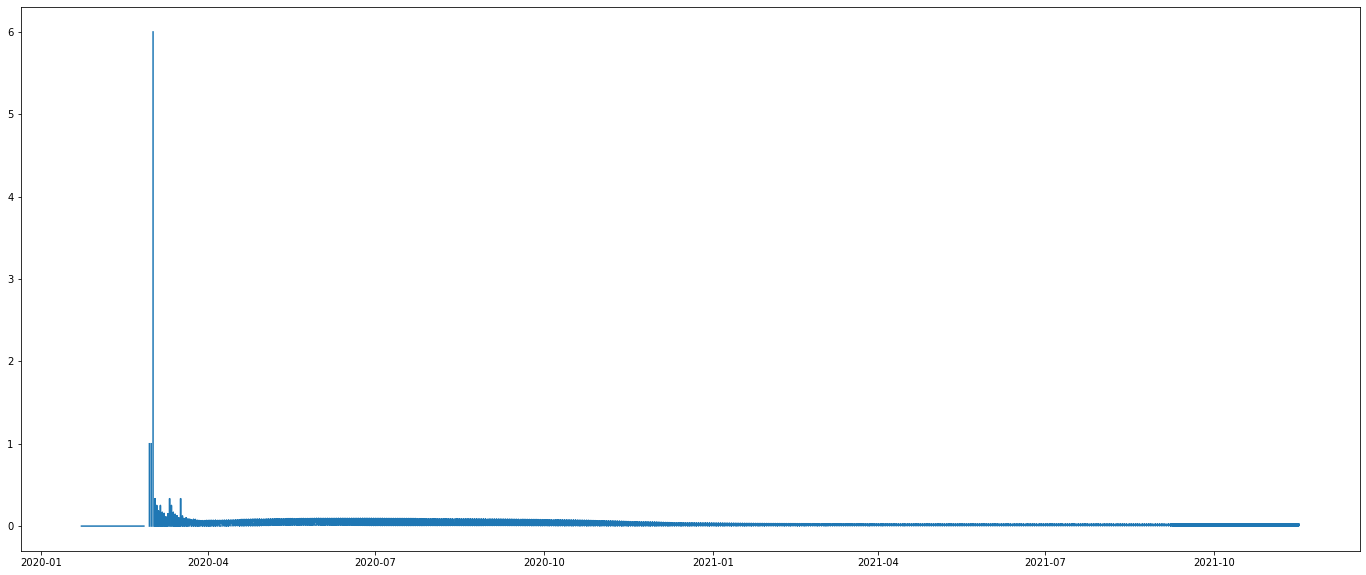

In [7]:
plt.figure(figsize=(24,10))
plt.plot(
    'date',
    'death_rate',
    data=state_df[pd.notnull(state_df.death_rate)]
)
plt.show()

<AxesSubplot:>

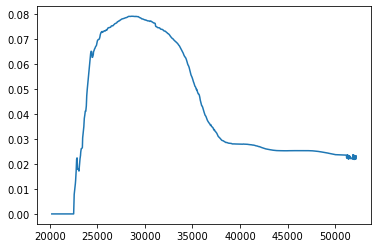

In [8]:
temp_df = state_df[state_df['state'] == 'MA']
temp_df[temp_df['death_rate'] != np.inf]
temp_df[pd.notnull(temp_df['death_rate'])].death_rate.plot()

# County Level Covid and Internet Data Analysis

In [9]:
og_county_covid_df = pd.read_csv('/Users/josephgreene/OneDrive/School/Cornell/Sophomore/Intro to Data Science/Project/project_county_covid_data')
og_county_internet_df = pd.read_csv('/Users/josephgreene/OneDrive/School/Cornell/Sophomore/Intro to Data Science/Project/project_county_internet_data')

In [10]:
county_covid_df = og_county_covid_df.copy()
county_internet_df = og_county_internet_df.copy()

In [11]:
county_covid_df['date'] = pd.to_datetime(county_covid_df['date'])
current_covid = county_covid_df.groupby(by='fips_code').max()
current_covid['death_rate'] = current_covid['tot_deaths'] / current_covid['tot_cases']
current_covid.drop(columns=['cases','cases_avg','cases_avg_per_100k','deaths','deaths_avg','deaths_avg_per_100k'],inplace=True)

In [12]:
# county_df is the most recent Covid data merged with internet data by county

county_df = pd.merge(current_covid,county_internet_df,on='fips_code',how='inner')
print(county_df.shape)
county_df.head()

(1860, 18)


,fips_code,Unnamed: 0_x,date,county,state,tot_deaths,tot_cases,death_rate,Unnamed: 0_y,County,State,Zip,AllProviderCount_2020,All25_3_2020,All100_3,TestCount,AverageMbps,FastestAverageMbps
0,1001,1044978,2021-11-17,Autauga,Alabama,155,10423,0.014871,117,Autauga,Alabama,36147.571429,9.714286,5.285714,3.571429,3381.166667,38.218333,76.748333
1,1005,1044976,2021-11-17,Barbour,Alabama,128,6538,0.019578,139,Barbour,Alabama,36085.000000,9.400000,5.000000,2.000000,113.666667,52.206667,113.016667
2,1007,1044975,2021-11-17,Bibb,Alabama,733,30266,0.024219,212,Bibb,Alabama,35581.142857,9.000000,4.000000,3.000000,226.714286,23.557143,60.075714
3,1011,1044973,2021-11-17,Bullock,Alabama,45,1527,0.029470,321,Bullock,Alabama,36057.000000,9.666667,3.666667,0.666667,415.333333,23.523333,54.103333
4,1013,1044972,2021-11-17,Butler,Alabama,1716,108787,0.015774,333,Butler,Alabama,36139.000000,8.750000,5.000000,2.000000,1380.500000,33.205000,88.965000


In [13]:
def merge_internet(df):
    df2 = pd.merge(df,county_internet_df,on='fips_code',how='inner')
    df2['death_rate'] = df2['tot_deaths'] / df2['tot_cases']
    df2.drop(columns=['cases','cases_avg','cases_avg_per_100k','deaths','deaths_avg','deaths_avg_per_100k'],inplace=True)
    return df2

In [14]:
print("Most recent Covid Data")
county_df.drop(columns=['fips_code','Unnamed: 0_x','Unnamed: 0_y','Zip']).corr().style.background_gradient(
    cmap='RdYlGn', 
    axis=None,
    vmin=-0.8, 
    vmax=0.8
)

Most recent Covid Data


,tot_deaths,tot_cases,death_rate,AllProviderCount_2020,All25_3_2020,All100_3,TestCount,AverageMbps,FastestAverageMbps
tot_deaths,1.000000,0.975029,-0.015497,0.009759,0.097463,0.154678,0.095965,0.225673,0.227794
tot_cases,0.975029,1.000000,-0.090582,0.033067,0.132158,0.188734,0.107425,0.245913,0.248610
death_rate,-0.015497,-0.090582,1.000000,-0.106464,-0.153082,-0.141471,-0.051599,-0.135666,-0.134460
AllProviderCount_2020,0.009759,0.033067,-0.106464,1.000000,0.688120,0.513560,0.071564,0.140251,0.166361
All25_3_2020,0.097463,0.132158,-0.153082,0.688120,1.000000,0.823650,0.164275,0.342872,0.369583
All100_3,0.154678,0.188734,-0.141471,0.513560,0.823650,1.000000,0.188812,0.454932,0.491336
TestCount,0.095965,0.107425,-0.051599,0.071564,0.164275,0.188812,1.000000,0.237013,0.246122
AverageMbps,0.225673,0.245913,-0.135666,0.140251,0.342872,0.454932,0.237013,1.000000,0.963743
FastestAverageMbps,0.227794,0.248610,-0.134460,0.166361,0.369583,0.491336,0.246122,0.963743,1.000000


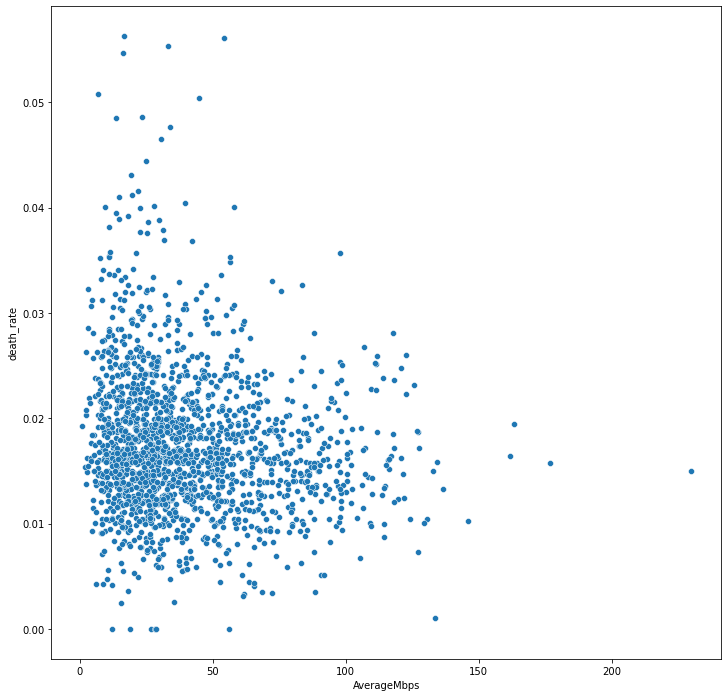

In [15]:
fig, plot = plt.subplots()
plot = sns.scatterplot(
    x='AverageMbps',
    y='death_rate',
    data=county_df,
)

fig.set_size_inches(12,12)
# rplt.figure(figsize=(12,12))
plt.show()

## Now looking only at March through June of 2020

In [16]:
# method from https://www.kite.com/python/answers/how-to-filter-pandas-dataframe-rows-by-date-in-python

start_date = "2020-09-01"
end_date = "2020-12-30"


after_start_date = county_covid_df["date"] >= start_date
before_end_date = county_covid_df["date"] <= end_date
between_two_dates = after_start_date & before_end_date
filtered_dates = county_covid_df.loc[between_two_dates]

In [17]:
temp_df = merge_internet(county_covid_df.loc[between_two_dates])
temp_df = temp_df.dropna(subset=['AverageMbps','death_rate'])

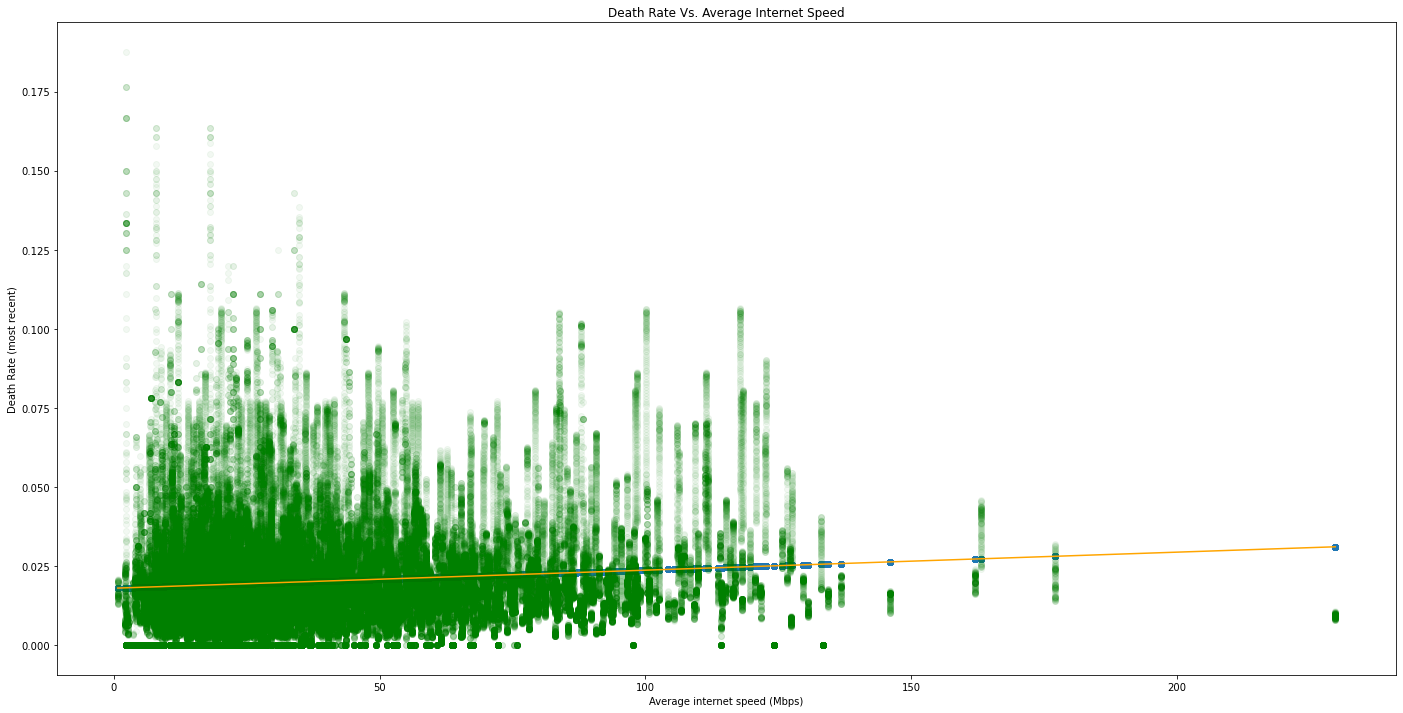

In [18]:
fig, plot = plt.subplots()
# plot = sns.scatterplot(
#     x='AverageMbps',
#     y='death_rate',
#     data=temp_df,
#     alpha=.08
# )

model = LinearRegression()
model.fit(
    temp_df[['AverageMbps']],
    temp_df['death_rate']
)

sorted_temp_df = temp_df.sort_values('AverageMbps')
y_pred = model.predict(sorted_temp_df[['AverageMbps']])

m = model.coef_[0]    # slope
b = model.intercept_  # intercept

y_pred_hand = m * sorted_temp_df['AverageMbps'] + b



plot = plt.scatter(sorted_temp_df.AverageMbps, y_pred)

plt.plot(sorted_temp_df.AverageMbps, y_pred_hand, c='orange')
plt.scatter(temp_df.AverageMbps,temp_df.death_rate, c='green',alpha=.05)
# plot = sns.regression(
#     x='AverageMbps',
#     y='death_rate',
#     data=temp_df,
# #     alpha=.08
# )

fig.set_size_inches(24,12)
plt.xlabel('Average internet speed (Mbps)')
plt.ylabel('Death Rate (most recent)')
plt.title('Death rate vs. average internet speed'.title())
plt.show()

<AxesSubplot:xlabel='AverageMbps', ylabel='death_rate'>

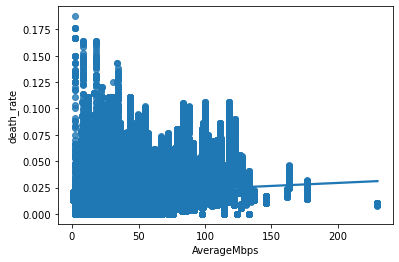

In [19]:
sns.regplot(
    x='AverageMbps',
    y='death_rate',
    data=temp_df,
# #     alpha=.08
)

In [20]:
temp_df[['death_rate','AverageMbps']].cov()

,death_rate,AverageMbps
death_rate,0.000244,0.042934
AverageMbps,0.042934,753.071829


In [21]:
m

5.701216332136916e-05

### Death rate for the entire pandemic may not be a good measure

In [22]:
temp_df.corr().style.background_gradient(
    cmap='RdYlGn', 
    axis=None,
    vmin=-0.8, 
    vmax=0.8
)

,Unnamed: 0_x,tot_deaths,tot_cases,death_rate,fips_code,Unnamed: 0_y,Zip,AllProviderCount_2020,All25_3_2020,All100_3,TestCount,AverageMbps,FastestAverageMbps
Unnamed: 0_x,1.000000,0.073938,0.161863,-0.142404,-0.008097,-0.000753,0.001340,-0.001314,-0.001126,-0.000926,0.000027,-0.000831,-0.000837
tot_deaths,0.073938,1.000000,0.856891,0.272751,-0.049888,0.039360,-0.139315,-0.020206,0.056574,0.117104,0.088490,0.216639,0.216952
tot_cases,0.161863,0.856891,1.000000,0.050011,-0.070211,-0.023191,-0.054821,0.032971,0.122692,0.169046,0.093548,0.218657,0.220519
death_rate,-0.142404,0.272751,0.050011,1.000000,0.010689,0.063825,-0.238045,-0.066503,-0.054487,0.008321,0.032045,0.100135,0.104454
fips_code,-0.008097,-0.049888,-0.070211,0.010689,1.000000,0.034917,-0.014832,0.007929,-0.049769,-0.050729,-0.039530,-0.036222,-0.033930
Unnamed: 0_y,-0.000753,0.039360,-0.023191,0.063825,0.034917,1.000000,0.021251,-0.002475,-0.009225,0.014476,0.018615,-0.022847,-0.020238
Zip,0.001340,-0.139315,-0.054821,-0.238045,-0.014832,0.021251,1.000000,0.236152,0.030442,-0.127117,-0.013695,-0.216712,-0.215678
AllProviderCount_2020,-0.001314,-0.020206,0.032971,-0.066503,0.007929,-0.002475,0.236152,1.000000,0.686988,0.511792,0.071371,0.139441,0.165608
All25_3_2020,-0.001126,0.056574,0.122692,-0.054487,-0.049769,-0.009225,0.030442,0.686988,1.000000,0.824025,0.164135,0.342193,0.368954
All100_3,-0.000926,0.117104,0.169046,0.008321,-0.050729,0.014476,-0.127117,0.511792,0.824025,1.000000,0.188690,0.454424,0.490883


In [23]:
county_covid_df.date.unique

<bound method Series.unique of 0         2020-01-21
1         2020-01-22
2         2020-01-23
3         2020-01-24
4         2020-01-24
             ...    
1933537   2021-11-17
1933538   2021-11-17
1933539   2021-11-17
1933540   2021-11-17
1933541   2021-11-17
Name: date, Length: 1933542, dtype: datetime64[ns]>

---

In [44]:
df.sample(10)

NameError: name 'df' is not defined

In [24]:
sub_df = temp_df.loc[temp_df['state'] == 'NY']
sub_df['trips_log'] = sub_df.trips.apply(lambda x: np.log(x))
sub_df['new_case_log'] = sub_df.new_case.apply(lambda x: np.log(x))
sub_df['new_death_log'] = sub_df.new_death.apply(lambda x: np.log(x))
sub_df['series_complete_yes_log'] = sub_df.series_complete_yes	.apply(lambda x: np.log(x))

AttributeError: 'DataFrame' object has no attribute 'trips'

In [ ]:
sub_df.sample(10)

In [ ]:
distances = [
    'trips',
    'trips_1_50', 
    'trips_50_500', 
    'trips_500'
]
distances_log = []


for distance in distances:
    label = str(distance+'_log')
    sub_df[label] = sub_df[distance].apply(lambda x: np.log(x))
    distances_log.append(label)

In [ ]:
sub_df[distances+['new_death','new_case']].corr().style.background_gradient(
    cmap='RdYlGn', 
    axis=None, 
#     vmin=-0.8, 
#     vmax=0.8
)

In [50]:
# creates melted df with log trips by distance
melted_sub = sub_df.melt(
    value_vars=distances_log,
    var_name='Distance',
    id_vars=['date','new_death_log','new_case_log']   
)

KeyError: 'trips'

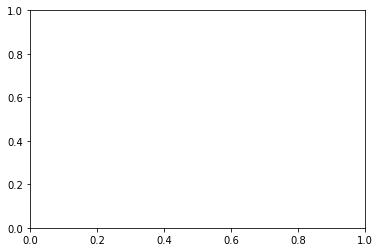

In [51]:
# melted_sub.groupby(by='Distance').size()

# melted_sub.shape
# plt.plot(melted_sub['value'],melted_sub['date'])#,'value',data=melted_sub.loc[melted_sub.Distance == 'trips'])
# plt.xlim(
    
# )
fig, ax = plt.subplots()
sns.lineplot(
    x=sub_df['date'],
    y=sub_df['trips'],
)
plt.xlim( 
    (date(2020, 3, 1), 
     date(2020, 5, 31))
)

fig.set_size_inches(24,8)
plt.show()

In [54]:
fig, ax = plt.subplots()
# ax = plt.plot(
#     sub_df.date,
#     sub_df.new_death_log.rolling(7, center=True).mean(), color='crimson', linewidth=3
# )
# ax2 = plt.twinx()
# ax2.plot(
#     sub_df.date,
#     sub_df.new_death_log.rolling(7, center=True).mean(), color='blue', linewidth=3
# )
sns.lineplot(
    x='date',
    y='value',
    hue='Distance', 
    data=melted_sub
)
# sns.lineplot(x='date',y='Distance')
fig.set_size_inches(24,8)
# plt.figure(figsize=(24,8))

plt.show()

In [53]:
sub_df.sort_values(by='date',inplace=True)
fig, ax = plt.subplots()
ax = plt.plot(
    sub_df.date,
    sub_df.new_case.rolling(7, center=True).mean(), color='crimson', linewidth=3
)

ax2 = plt.twinx()
ax2.plot(
    sub_df.date,
    sub_df.series_complete_yes, #.rolling(7, center=True).mean(),
    color='blue', linewidth=3
)

ax3 = plt.twinx()
ax3.plot(
    sub_df.date,
    sub_df.trips.rolling(7, center=True).mean(),
    color='green', linewidth=3
)

ax4 = plt.twinx()
ax4.plot(
    sub_df.date,
    sub_df.administered,
    color='green', linewidth=3
)


fig.set_size_inches(24,8)
plt.show()

In [ ]:
sub_df.sort_values(by='date',inplace=True)
fig, ax = plt.subplots()
ax = plt.plot(
    sub_df.date,
    sub_df.new_case.rolling(7, center=True).mean(), color='crimson', linewidth=3
)

ax2 = plt.twinx()
ax2.plot(
    sub_df.date,
    sub_df.series_complete_yes, #.rolling(7, center=True).mean(),
    color='blue', linewidth=3
)

ax3 = plt.twinx()
ax3.plot(
    sub_df.date,
    sub_df.trips.rolling(7, center=True).mean(),
    color='green', linewidth=3
)

ax4 = plt.twinx()
ax4.plot(
    sub_df.date,
    sub_df.administered,
    color='green', linewidth=3
)

ax5 = plt.twinx()
ax5.plot(
    sub_df.date,
    sub_df.death_rate

)

fig.set_size_inches(24,8)
plt.show()

In [ ]:
fig.axes

In [55]:
temp_df = sub_df.loc[pd.notnull(sub_df['new_case']) & pd.notnull(sub_df['trips'])]


# sns.set_style('ticks')

case_trips_model = LinearRegression()
case_trips_model.fit(temp_df[[ 'new_case' ]], temp_df['trips'])

y_pred = case_trips_model.predict(temp_df[['new_case']])

m = case_trips_model.coef_[0]    # slope
b = case_trips_model.intercept_  # intercept

y_pred_hand = m * temp_df['new_case']


# plot = sns.regplot(
#     y=sub_df.new_case,
#     x=sub_df.trips_log
# )
# plot.figure.set_size_inches(12,12)
temp_df.sort_values(by='trips',inplace=True)

plt.plot(
    temp_df['trips'],
    y_pred_hand
)

# # plt(figsize=(24,3))
# # .figure(figsize=(24,8))
# plt.show()


KeyError: 'new_case'

In [56]:

sns.lineplot(
    x=sub_df.date,
    y=sub_df[[
#     'date',
    'trips',
    'trips_1', 
    'trips_1_3', 
    'trips_3_5', 
    'trips_5_10',
    'trips_10_25',
    'trips_25_50', 
    'trips_50_100', 
    'trips_100_250', 
    'trips_250_500',
    'trips_500'
]],
    hue=sub_df[[
#     'date',
    'trips',
    'trips_1', 
    'trips_1_3', 
    'trips_3_5', 
    'trips_5_10',
    'trips_10_25',
    'trips_25_50', 
    'trips_50_100', 
    'trips_100_250', 
    'trips_250_500',
    'trips_500'
    ]],
)

KeyError: "None of [Index(['trips', 'trips_1', 'trips_1_3', 'trips_3_5', 'trips_5_10',\n       'trips_10_25', 'trips_25_50', 'trips_50_100', 'trips_100_250',\n       'trips_250_500', 'trips_500'],\n      dtype='object')] are in the [columns]"

In [ ]:
values = sub_df[[
    'trips',
    'trips_1',
    'trips_1_3',
    'trips_3_5',
    'trips_5_10',
    'trips_10_25',
    'trips_25_50',
    'trips_50_100',
    'trips_100_250',
    'trips_250_500',
    'trips_500']]
pd.melt(sub_df[['date']],values)

In [ ]:
sub_df

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(
    sub_df.new_death,
    sub_df.trips
    
)
plt.xlabel('new_deaths')
plt.ylabel('trips')
plt.show()

In [ ]:
ma_non_nan_trips = state_data1_dict["MA"].copy().loc[pd.notnull(state_data1_dict['MA'].trips)] 
temp_x = np.arange(len(ma_non_nan_trips.index))

# define custom function to fit
def quadratic(X, a, b, c):
    '''Second-order polynomial function'''
    return a*X**5 + b*X + c


# fit function parameters
quad_opt, quad_cov = curve_fit(quadratic, temp_x, ma_non_nan_trips.trips)

# plot results
ma_trips_scatter = sns.scatterplot(
    x=temp_x,
    y=ma_non_nan_trips.trips
)
plt.plot(temp_x, quadratic(temp_x, *quad_opt), c='orange', alpha=0.5) # predicted data

# plt.xlabel('Mean age (years)')
# plt.ylabel('Population change (%)')
plt.tight_layout()
plt.show()

In [ ]:
model = np.polynomial.Polynomial.fit(
    temp_x,
    ma_non_nan_trips.trips,
    3)

# plot output
sns.scatterplot(data=ma_non_nan_trips, x=temp_x, y='trips')
# trips = auto_df['horsepower'].sort_values()
plt.plot(temp_x, model(temp_x), c='orange')
plt.show()

In [ ]:
r2s = []
for i in range (0,30):
    model = np.polynomial.Polynomial.fit(
        temp_x,
        ma_non_nan_trips.trips,
        i)
    
    r2 = np.corrcoef(model(temp_x), ma_non_nan_trips['trips'])[0, 1]
    
    r2s.append(r2)


plt.plot(range(30),r2s)
plt.xticks(range(30))
plt.grid()
plt.show()
r2s

In [ ]:
r2chngs = []

for i in range(len(r2s)):
#     print(i)
    r2chng = r2s[i]-r2s[i-1]
    r2chngs.append(r2chng)

plt.plot(range(30),r2chngs)
plt.xticks(range(30))
plt.grid()
plt.show()
r2s

-----
## County mapping

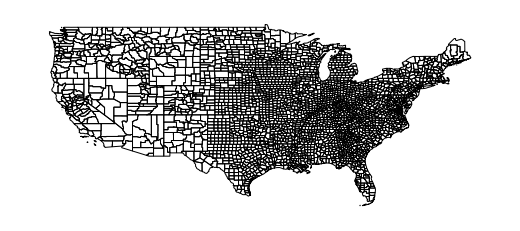

In [33]:
# Instructions from https://www.python-graph-gallery.com/choropleth-map-geopandas-python

# Import the geopandas and geoplot libraries
import geopandas as gpd
import geoplot as gplt

# Load the json file with county coordinates
geoData = gpd.read_file('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/US-counties.geojson')

# Make sure the "id" column is an integer
geoData.id = geoData.id.astype(str).astype(int)

# Remove Alaska, Hawaii and Puerto Rico.
stateToRemove = ['02', '15', '72']
geoData = geoData[~geoData.STATE.isin(stateToRemove)]
geoData.rename(columns={'id':'fips_code'}, inplace=True)

# Basic plot with just county outlines
gplt.polyplot(geoData, figsize=(20, 4));


In [34]:
county_df

,fips_code,Unnamed: 0_x,date,county,state,tot_deaths,tot_cases,death_rate,Unnamed: 0_y,County,State,Zip,AllProviderCount_2020,All25_3_2020,All100_3,TestCount,AverageMbps,FastestAverageMbps
0,1001,1044978,2021-11-17,Autauga,Alabama,155,10423,0.014871,117,Autauga,Alabama,36147.571429,9.714286,5.285714,3.571429,3381.166667,38.218333,76.748333
1,1005,1044976,2021-11-17,Barbour,Alabama,128,6538,0.019578,139,Barbour,Alabama,36085.000000,9.400000,5.000000,2.000000,113.666667,52.206667,113.016667
2,1007,1044975,2021-11-17,Bibb,Alabama,733,30266,0.024219,212,Bibb,Alabama,35581.142857,9.000000,4.000000,3.000000,226.714286,23.557143,60.075714
3,1011,1044973,2021-11-17,Bullock,Alabama,45,1527,0.029470,321,Bullock,Alabama,36057.000000,9.666667,3.666667,0.666667,415.333333,23.523333,54.103333
4,1013,1044972,2021-11-17,Butler,Alabama,1716,108787,0.015774,333,Butler,Alabama,36139.000000,8.750000,5.000000,2.000000,1380.500000,33.205000,88.965000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1855,56031,1041823,2021-11-17,Platte,Wyoming,139,13369,0.010397,2333,Platte,Wyoming,82210.600000,9.000000,5.600000,1.400000,361.600000,15.556000,37.120000
1856,56035,1041821,2021-11-17,Sublette,Wyoming,22,1463,0.015038,2773,Sublette,Wyoming,82989.833333,7.833333,3.500000,0.500000,271.666667,9.728333,22.696667
1857,56037,1041820,2021-11-17,Sweetwater,Wyoming,97,7965,0.012178,2806,Sweetwater,Wyoming,82922.666667,13.000000,7.000000,3.000000,10512.333333,20.593333,48.770000
1858,56041,1041818,2021-11-17,Uinta,Wyoming,30,3985,0.007528,2909,Uinta,Wyoming,82934.000000,10.500000,5.000000,2.750000,2199.750000,25.090000,61.785000


In [35]:
geoData

,fips_code,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry
0,1001,0500000US01001,01,001,Autauga,County,594.436,"POLYGON ((-86.49677 32.34444, -86.71790 32.402..."
1,1009,0500000US01009,01,009,Blount,County,644.776,"POLYGON ((-86.57780 33.76532, -86.75914 33.840..."
2,1017,0500000US01017,01,017,Chambers,County,596.531,"POLYGON ((-85.18413 32.87053, -85.12342 32.772..."
3,1021,0500000US01021,01,021,Chilton,County,692.854,"POLYGON ((-86.51734 33.02057, -86.51596 32.929..."
4,1033,0500000US01033,01,033,Colbert,County,592.619,"POLYGON ((-88.13999 34.58170, -88.13925 34.587..."
...,...,...,...,...,...,...,...,...
3216,51001,0500000US51001,51,001,Accomack,County,449.496,"MULTIPOLYGON (((-75.24227 38.02721, -75.29687 ..."
3217,51021,0500000US51021,51,021,Bland,County,357.725,"POLYGON ((-81.22510 37.23487, -81.20477 37.243..."
3218,51027,0500000US51027,51,027,Buchanan,County,502.763,"POLYGON ((-81.96830 37.53780, -81.92787 37.512..."
3219,51037,0500000US51037,51,037,Charlotte,County,475.271,"POLYGON ((-78.44332 37.07940, -78.49303 36.891..."


In [36]:
geoData.merge(county_df, on='fips_code')

,fips_code,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry,Unnamed: 0_x,date,...,Unnamed: 0_y,County,State,Zip,AllProviderCount_2020,All25_3_2020,All100_3,TestCount,AverageMbps,FastestAverageMbps
0,1001,0500000US01001,01,001,Autauga,County,594.436,"POLYGON ((-86.49677 32.34444, -86.71790 32.402...",1044978,2021-11-17,...,117,Autauga,Alabama,36147.571429,9.714286,5.285714,3.571429,3381.166667,38.218333,76.748333
1,1017,0500000US01017,01,017,Chambers,County,596.531,"POLYGON ((-85.18413 32.87053, -85.12342 32.772...",1044970,2021-11-17,...,462,Chambers,Alabama,36858.500000,9.750000,4.750000,2.500000,3069.000000,52.530000,141.825000
2,1045,0500000US01045,01,045,Dale,County,561.150,"POLYGON ((-85.41644 31.61947, -85.41743 31.314...",1044956,2021-11-17,...,729,Dale,Alabama,36353.600000,8.800000,6.000000,2.200000,2369.500000,65.937500,178.210000
3,1051,0500000US01051,01,051,Elmore,County,618.485,"POLYGON ((-86.33678 32.76747, -86.31948 32.753...",1044953,2021-11-17,...,894,Elmore,Alabama,36054.222222,11.888889,7.444444,5.000000,2369.555556,46.221111,124.100000
4,1065,0500000US01065,01,065,Hale,County,643.943,"POLYGON ((-87.42120 32.87451, -87.47217 32.830...",1044946,2021-11-17,...,1179,Hale,Alabama,36240.000000,12.200000,4.200000,1.000000,2402.333333,17.096667,40.803333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852,50027,0500000US50027,50,027,Windsor,County,969.337,"POLYGON ((-72.77154 43.47786, -72.79107 43.495...",1042139,2021-11-17,...,3145,Windsor,Vermont,5127.533333,11.571429,5.000000,3.428571,2768.071429,58.275000,123.760714
1853,51001,0500000US51001,51,001,Accomack,County,449.496,"MULTIPOLYGON (((-75.24227 38.02721, -75.29687 ...",1042137,2021-11-17,...,2,Accomack,Virginia,23379.407407,9.913043,4.086957,1.826087,895.571429,56.293571,109.885714
1854,51021,0500000US51021,51,021,Bland,County,357.725,"POLYGON ((-81.22510 37.23487, -81.20477 37.243...",1042126,2021-11-17,...,229,Bland,Virginia,24328.250000,11.500000,5.500000,2.750000,317.500000,7.005000,19.327500
1855,51037,0500000US51037,51,037,Charlotte,County,475.271,"POLYGON ((-78.44332 37.07940, -78.49303 36.891...",1042115,2021-11-17,...,473,Charlotte,Virginia,23954.300000,9.200000,4.200000,1.200000,167.250000,11.103750,22.971250
